In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
wine = pd.read_csv('save_total.csv')
df = wine.copy()

In [132]:
df['quality'] = df['quality'].apply(lambda x: '나쁨' if x <= 5 else '좋음')

In [152]:
X=df.drop('quality',axis=1)
X1 = df[['alcohol', 'sulphates', 'volatile acidity', 'chlorides', 'pH', 'total sulfur dioxide']]
y=df['quality']

from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)

In [153]:
knn.fit(X1_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [154]:
knn.score(X1_test,y_test), knn.score(X1_train,y_train)

(0.7610294117647058, 0.7736890524379025)

In [136]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

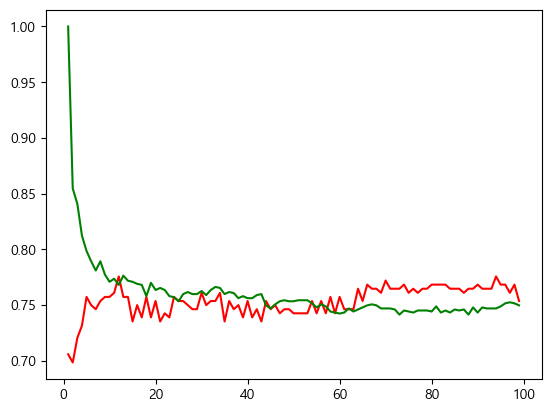

In [137]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

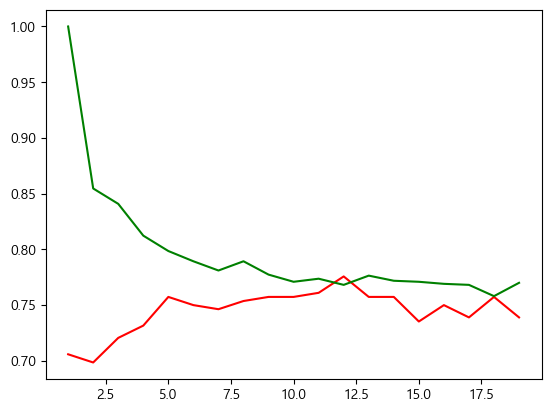

In [144]:
acc_test=[]
acc_train=[]
for i in range(1,20):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(1,20), acc_test,'r')
plt.plot(range(1,20), acc_train, 'g')

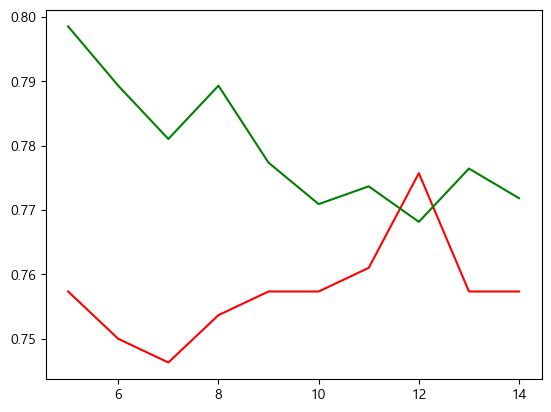

In [145]:
acc_test=[]
acc_train=[]
for i in range(5,15):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(5,15), acc_test,'r')
plt.plot(range(5,15), acc_train, 'g')

In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.2f}')


최적의 파라미터: {'n_neighbors': 76}
최적의 정확도: 0.60


In [59]:
#최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X1_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.6139705882352942


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 24}
최적의 F1 점수: 0.5565


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')

최적의 파라미터: {'n_neighbors': 76}
최적의 F1 점수: 0.5970


--------------------------------------------------------------

# 맨하튼 거리

In [169]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=13, metric='manhattan')
knn_manhattan.fit(X1_train, y_train)

knn_manhattan.score(X1_test,y_test), knn_manhattan.score(X1_train,y_train)

(0.7536764705882353, 0.7681692732290708)

In [156]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))

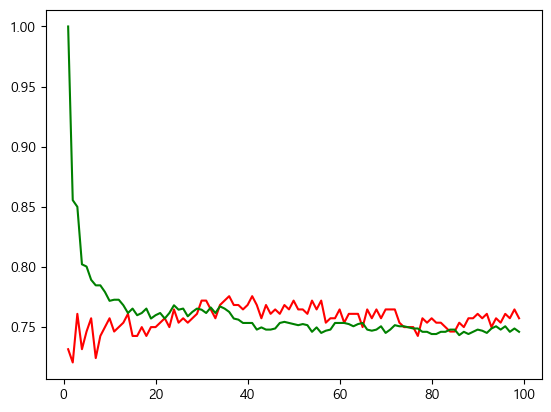

In [157]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

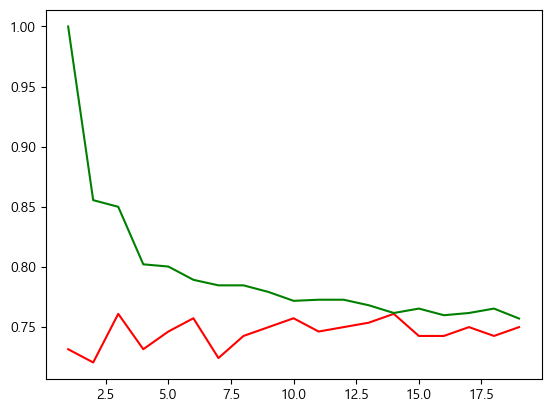

In [161]:
acc_test=[]
acc_train=[]
for i in range(1,20):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(1,20), acc_test,'r')
plt.plot(range(1,20), acc_train, 'g')

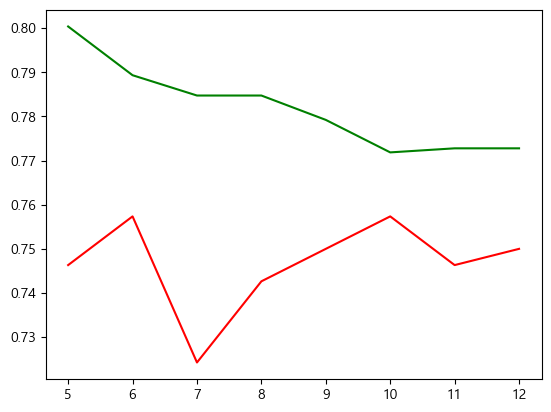

In [162]:
acc_test=[]
acc_train=[]
for i in range(5,13):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(5,13), acc_test,'r')
plt.plot(range(5,13), acc_train, 'g')

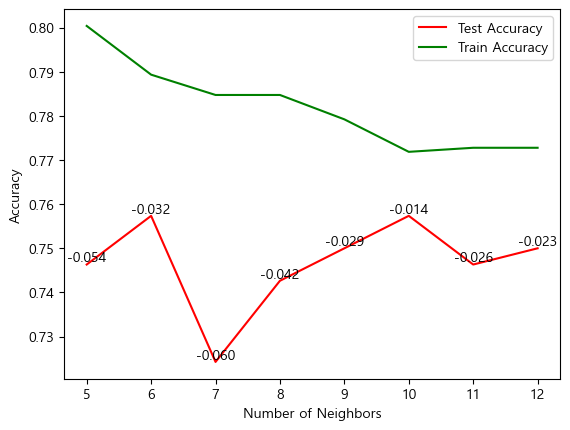

In [163]:
acc_test = []
acc_train = []

for i in range(5, 13):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(5, 13), acc_test, 'r', label='Test Accuracy')
plt.plot(range(5, 13), acc_train, 'g', label='Train Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

# 빨간색 및 초록색 선 사이의 간격 계산
gap_values = [test - train for test, train in zip(acc_test, acc_train)]

# 간격 수치를 그래프에 표시
for i, gap in enumerate(gap_values):
    plt.text(i + 5, acc_test[i], f'{gap:.3f}', ha='center', va='bottom')

plt.show()


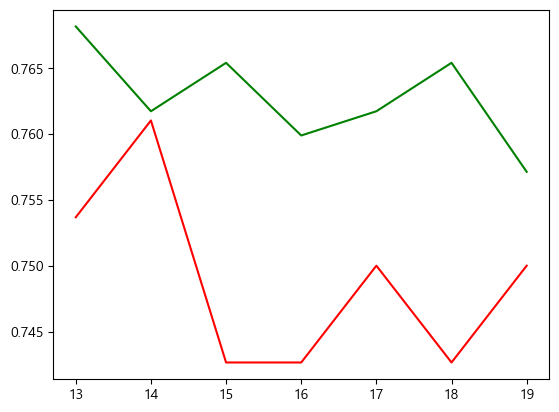

In [168]:
acc_test=[]
acc_train=[]
for i in range(13,20):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X1_train, y_train)
    acc_test.append(knn_k.score(X1_test, y_test))
    acc_train.append(knn_k.score(X1_train, y_train))
    
plt.plot(range(13,20), acc_test,'r')
plt.plot(range(13,20), acc_train, 'g')

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.4f}')

최적의 파라미터: {'n_neighbors': 75}
최적의 정확도: 0.5952


In [78]:
# 최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X1_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.6286764705882353


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 53}
최적의 F1 점수: 0.5554


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X1_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')

최적의 파라미터: {'n_neighbors': 75}
최적의 F1 점수: 0.5952


-------------------------------------------------------------

# 체비셰프 거리

In [112]:
# 체비셰프 거리를 사용하는 KNeighborsClassifier 생성
knn_chebyshev = KNeighborsClassifier(n_neighbors=17, metric='chebyshev')
knn_chebyshev.fit(X1_train, y_train)

# 테스트 세트 및 훈련 세트에 대한 정확도 출력
accuracy_test = knn_chebyshev.score(X1_test, y_test)
accuracy_train = knn_chebyshev.score(X1_train, y_train)

print(f'체비셰프 거리를 사용한 KNN의 테스트 정확도: {accuracy_test:.4f}')
print(f'체비셰프 거리를 사용한 KNN의 훈련 정확도: {accuracy_train:.4f}')


체비셰프 거리를 사용한 KNN의 테스트 정확도: 0.5809
체비셰프 거리를 사용한 KNN의 훈련 정확도: 0.6283


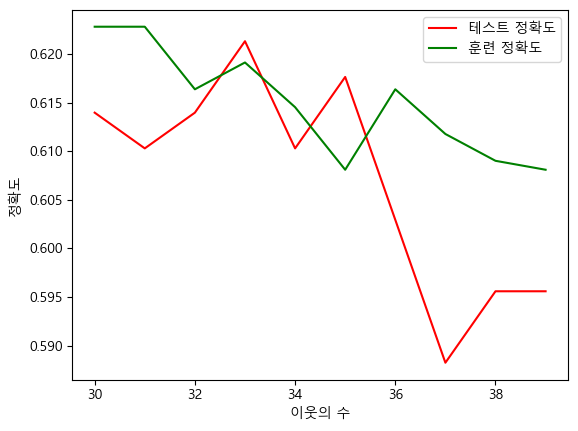

In [114]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 그래프 그리기
plt.plot(range(30, 40), acc_test, 'r', label='테스트 정확도')
plt.plot(range(30, 40), acc_train, 'g', label='훈련 정확도')
plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show()
